# Introduction

The report includes the effort for Data Analysis for the WeRateDogs twitter based dog ratings as of August 2017. WeRateDogs has a unique approach to their rating system, that has resulted in a strong Twitter following. WeRateDogs ratings which are out of 10, are more commonly above this mark and they also have a customized dog classification with a dedicated 'dogtionary' classifying the different dog stages. All of these factors will be considered using the data provided directly by WeRateDogs, while combining more information by directly gathering data using the Twitter API Tweepy. Another layer was added for data that includes AI predictions for the different dog breeds in question. 

The original twitter data provided by WeRateDogs consisted of over 5000 different tweets. This data was futher enhanced to only include tweets with images to work in conjunction with the image prediction data.The enhanced data also includes the tweet text which was extracted to include 'rating', 'dog name', and 'dog stage' (doggo, floof(er), pupper, puppo). The twitter API gathering effort was to extract important indicators like 'retweet count' and 'favorite count'. And the dog prediction file makes an effort to be as robust as possible including efforts at predicting the breed acompanied by a prediction confidence calculation.

All the different sources will be gathered, assessed, cleaned and combined to provide a master data file to effectively provide a clear insight on the WeRateDogs rating system.


# Gather

In [1]:
#imports

import pandas as pd
import numpy as np
import tweepy
import json
import time

#### Dataframe 1 - Created from csv file provided by WeRateDogs
Dataframe below is the enhanced dataframe that consists of 2356 observations of the the original 5000+ provided by WeRateDogs twitter archive. The data in the dataframe below is filtered to only include data that has ratings. The dataframe was also extracted to include some important new columns: 'rating', 'dog name', and 'dog stage' (doggo, floof(er), pupper, puppo)

In [5]:
dfratedogs = pd.read_csv('twitter-archive-enhanced.csv')
dfratedogs.shape

(2356, 17)

#### Dataframe 2 - Created from tsv file in Udacity Dog breed predictor data
Dataframe below was extracted from a dog breed 'image prediction file' stored on a Udacity hosted server. The dataframe below includes dog breed predictions based on the image file from the specific twitter post. The file also includes other assessments like 'confidence' of the prediction and whether the image assesses the picture as that of a dog.

In [6]:
# Latest pandas doesn't require request library to import from URL
tsv_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
dfbreed = pd.read_csv(tsv_url, sep = '\t')
dfbreed.shape

(2075, 12)

#### Dataframe 3 - RateDogs missing Data retreived using twitter API 
Dataframe will utilize twitter API to gather other informaiton like 'retweet count' and 'favorite count'

In [7]:
# Keys removed for project submission
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# API Instance
api = tweepy.API(auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True,
                 parser = tweepy.parsers.JSONParser(),)

Total time taken for the API fetch below was approximately 40 minutes. The code below was run for 40 minutes storing all the fetched information in a JSOn textfile

In [4]:
# external time measurer for this using time library
start = time.time()

# Start by creating list to capture specific data from WeRateDogs using tweep API
favtweet_list = []
for tweetid in dfratedogs.tweet_id:
    try:
        fetch = api.get_status(tweetid, tweet_mode='extended')
        favtweet_list.append({'tweet_id': int(fetch['id_str']), 
                            'retweet_count': int(fetch['retweet_count']),
                            'favorite_count': int(fetch['favorite_count'])})
    # catch *all* exceptions and print out tweet id      
    except Exception as e: 
        print(str(tweetid)+ " _ " + str(e)) 
    
end = time.time() #run after API fetch is complete
print(end - start)
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(favtweet_list, outfile)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 423
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
771004394259247104 _ [{'code': 179, 'message': 'Sorry, you are not auth

In [8]:
#Convert json text file into a pandas dataframe
dfapi = pd.read_json('tweet_json.txt')

# Fewer observations from the tweet API as certain IDs could not be found
dfapi.shape

(2342, 3)

In [9]:
# list of failed ids to be used later
failedids_list = [888202515573088257,873697596434513921,869988702071779329,866816280283807744,861769973181624320,
              845459076796616705,842892208864923648,837012587749474308,827228250799742977,802247111496568832,
              775096608509886464,771004394259247104,770743923962707968,754011816964026368]

# Assess
    

#### Dataframe 1 - WeRateDogs Enhanced Data

In [10]:
dfratedogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
dfratedogs.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


* TIDINESS: dog stages ('doggo', 'floofer', 'pupper', 'puppo') are dog classifications set up as a column header
* QUALITY: 'timestamp' includes an obsolete seconds portion (+0000) and is of the wrong datatype
* QUALITY: Incorret 'name' entries like 'None' and single characters names identified


In [12]:
# Observe columns for 'retweets' and 'in reply'
# set_option below sets the column width to max in order to display complete 'text' field
pd.set_option('display.max_colwidth', -1)
dfratedogs[dfratedogs.retweeted_status_id.notnull()]['text'].head()

19    RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX    
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo                                                                                            
36    RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5         
68    RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…  
73    RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…
Name: text, dtype: object

In [13]:
# Use "lilly" as an example to observe actual post and retweet post
dfratedogs[dfratedogs.name == 'Lilly']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
356,830583320585068544,NaN,NaN,2017-02-12 01:04:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None


In [14]:
# Do the same for 'reply' tweets
pd.set_option('display.max_colwidth', -1)
dfratedogs[dfratedogs.in_reply_to_status_id.notnull()]['text'].head(2)

30    @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
55    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s              
Name: text, dtype: object

In [15]:
# reset colwidth back to default
pd.set_option('display.max_colwidth', 50)


* QUALITY: Rows where 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are not null are duplicates of original postings
* QUALITY: Rows where 'in_reply_to_status_id', 'in_reply_to_user_id' are not null are not null are duplicates of original postings

In [16]:
# Pattern in 'source' column is that source is either 'twitter' or 'vine'
dfratedogs[~dfratedogs.source.str.contains('twitter')]['source'].head(2)

529    <a href="http://vine.co" rel="nofollow">Vine -...
562    <a href="http://vine.co" rel="nofollow">Vine -...
Name: source, dtype: object

In [17]:
dfratedogs[dfratedogs.source.str.contains('twitter')]['source'].head(2)

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

* QUALITY: 'source' identifies a URL which is too specific to be useful as discrete data for analaysis

In [18]:
# Pattern in expanded urls is that the post is mostly 'photo' or 'video' with other unique URLS
dfratedogs[~dfratedogs.expanded_urls.str.contains('photo').isnull()]['expanded_urls'].str[-7:-2].value_counts().head()


photo    2077
video      82
ZI1rq       2
3LZqX       2
aj1Vp       2
Name: expanded_urls, dtype: int64

* QUALITY: 'expanded_urls' is not grouped together in discrete buckets to be useful for data analysis


In [19]:
# Visual attempt to identify patterns in 'expanded_urls' other than urls ending in 'video' or 'photo'
dfratedogs[~dfratedogs['expanded_urls'].str[-7:-2].isin(['photo', 'video'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None
88,875097192612077568,NaN,NaN,2017-06-14 21:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,NaN,NaN,NaN,https://twitter.com/drboondoc/status/874413398...,13,10,None,None,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None


* QUALITY Beyond 'video' and 'photo': 3 other types identified (vines, external twitter posts, external posts). Out of these the external posts do not apply to a dog rating, but instead relates to a article. 

In [20]:
pd.set_option('display.max_colwidth', -1)
# Expanded URLs seem to be null for retweets, and should be removed in earler steps. 
## There is a possiblity that some null values might still exist
dfratedogs[dfratedogs.expanded_urls.isnull()]['text'].head()

30     @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution                             
55     @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                           
64     @RealKentMurphy 14/10 confirmed                                                                                                       
113    @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs                                                                          
148    @Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10
Name: text, dtype: object

In [21]:
#rest column width
pd.set_option('display.max_colwidth', 50)
# Some exceptions for null Expanded urls with no explanation
# For .query() use trick value != value to query Null values
dfratedogs.query('(expanded_urls != expanded_urls) & (in_reply_to_status_id != in_reply_to_status_id) & (retweeted_status_id != retweeted_status_id)')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


* QUALITY: further posts identifed as either 'reply/retweet posts' and 'non dog rated' posts whereever 'expanded_urls' is NULL

In [22]:
#Many names that are 'None'
len(dfratedogs[dfratedogs.name == 'None']['text'])

745

* QUALITY: Remove 'name' column as it is not necessary for analysis. Even more reason with so many 'None' values

In [23]:
#Rating denominator should only be 10, however we see other values
dfratedogs.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
# to display the fields like a SQL select statement we need index values for 'text', 'numerator' and 'denominator'
# query to find index values
'text index {0}, numerator index {1}, denominator index {2}'.format(dfratedogs.columns.get_loc("text"), dfratedogs.columns.get_loc("rating_numerator"), dfratedogs.columns.get_loc("rating_denominator"))

'text index 5, numerator index 10, denominator index 11'

In [25]:
#adjust column width so text can be viewed
pd.set_option('display.max_colwidth', -1)
#use index from above to create array 
column_array = np.r_[5,10,11]
# query all values were denominator value is not equal to  10
dfratedogs.iloc[:, column_array].query('rating_denominator != 10')

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


* QUALITY: Various Ratings denominator inconsistencies putting value above 10

In [26]:
# widen column width to view 'text'
pd.set_option('display.max_colwidth', -1)
dfratedogs.query('(rating_numerator > 20) & (rating_denominator <20)')['text']

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                                   
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                                    
290     @markhoppus 182/10                                                                                                                                                       
313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                             
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and 

In [27]:
#reset colwidth
pd.set_option('display.max_colwidth', 50)

* QUALITY: Various numerator ratings inconsistencies putting rating above 14
* TIDINESS: Ratings separated into two separate denominator and numerator column


In [28]:
# Assessing validitiy of the different dog stages compared to text field
'Number of times value in text column mismatches with dog stages: doggo={0}, floofer={1}, pupper={2}, puppo={3}'.format(len(dfratedogs[(dfratedogs.doggo!='doggo') & dfratedogs.text.str.contains('doggo')]),len(dfratedogs[(dfratedogs.floofer!='floofer') & dfratedogs.text.str.contains('floofer')]),len(dfratedogs[(dfratedogs.pupper!='pupper') & dfratedogs.text.str.contains('pupper')]),len(dfratedogs[(dfratedogs.puppo!='puppo') & dfratedogs.text.str.contains('puppo')]))

'Number of times value in text column mismatches with dog stages: doggo=10, floofer=0, pupper=24, puppo=8'

* QUALITY: Inconsistency in the dog stage values, where confirmation of value received from 'text' field

#### Dataframe 2 - Dog breed data 
Data received from a image prediction file that can classify breeds of dogs while also providing the confidence of that prediction

In [29]:
dfbreed.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [30]:
dfbreed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
# Important to check uniqueness as the data from these tables will be used for join
dfbreed[dfbreed.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [32]:
dfbreed.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [33]:
# Number that evaluated to True on Prediction 1
len(dfbreed[dfbreed.p1_dog == True])

1532

In [34]:
# p1 confidence is always higher, so if it evaluates to a dog its the breed we go with
dfbreed.query('p2_conf > p1_conf')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [35]:
# An example of the final scenario where we have to rely on the p3 prediction
len(dfbreed.query('(p1_dog==False) & (p2_dog==False) & (p3_dog==True)'))

64

* TIDINESS: 'Columns as headers' as three predictions exists for each posting


#### Dataframe 3 - RateDogs data using Tweepy API

In [36]:
dfapi.head()

,favorite_count,retweet_count,tweet_id
0,38522,8496,892420643555336193
1,33026,6245,892177421306343426
2,24860,4139,891815181378084864
3,41917,8617,891689557279858688
4,40067,9354,891327558926688256


In [37]:
dfapi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 3 columns):
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
tweet_id          2342 non-null int64
dtypes: int64(3)
memory usage: 73.2 KB


In [38]:
# Important to check uniqueness as the data from these tables will be used for join
dfapi[dfapi.duplicated()]

,favorite_count,retweet_count,tweet_id


In [39]:
dfapi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 3 columns):
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
tweet_id          2342 non-null int64
dtypes: int64(3)
memory usage: 73.2 KB


* TIDINESS: Fewer unique IDs compared to dfratedogs data

#### Assessment Summary
*Quality Issues: Organized in order of priority (Completeness, Validity, Accuracy, Consistency)*
* dfratedogs: Rows where 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are not null are duplicates of original postings
* dfratedogs: Rows where 'in_reply_to_status_id', 'in_reply_to_user_id' are not null are not null are duplicates of original postings
* dfratedogs: further posts identifed as either 'reply/retweet posts' and 'non dog rated' posts whereever 'expanded_urls' is NULL
* dfratedogs: 'expanded_urls' that do not fall in the vine or twitter domain are external news articles 
* dfratedogs: 'timestamp' includes an obsolete seconds portion (+0000) and is of the wrong datatype
* dfratedogs: Various Ratings denominator inaccuracies and inconsistencies putting value above 10
* dfratedogs: Various numerator ratings inaccuracies and inconsistencies putting rating above 14
* dfratedogs: 'source' identifies a URL which is too specific to be useful as discrete data for analaysis
* dfratedogs: 'expanded_urls' is not grouped together in discrete buckets to be useful for data analysis
* dfratedogs: Inconsistency in the dog stage values, where confirmation of value received from 'text' field
* dfratedogs: Incorret 'name' entries like 'None' and single characters names identified and other columns will become unnessary after quality transformations are performed

*Tidiness Issues*
* dfratedogs: Ratings separated into two separate denominator and numerator column
* dfratedogs: dog stages ('doggo', 'floofer', 'pupper', 'puppo') are dog classifications set up as a column header
* dfbreed: 'Columns as headers' as three predictions exists for each posting
* dfapi: Fewer unique IDs compared to dfratedogs data
* all dataframes: Combine dataframes and ensure tidiness and quality by ensuring Null rows and obsolete columns are removed

# Clean and Test

Start by making a copy of dataframe1(dfratedogs) which is going through most of the Quality transformations

In [40]:
#Start by making a copy of the dataframe1 used in assessment section
df1 = dfratedogs.copy()
df1.shape

(2356, 17)

#### Issue
Rows where 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are not null are duplicates of original postings

#### Define
Remove retweeted data by removing any rows associated with data being present in 'rewteeted_status_id' having any content

In [41]:
## Done by recreating same dataframe by filtering retweeted id field when null
df1 = df1[df1.retweeted_status_id.isnull()]
df1.shape

(2175, 17)

#### Test 
Verify if any rows exist where 'retweet_status_user_id' is not null

In [42]:
len(df1[~df1.retweeted_status_user_id.isnull()])

0

#### Issue
Rows where 'in_reply_to_status_id', 'in_reply_to_user_id' are not null are not null are duplicates of original postings

#### Define 
Remove reply data by removing any rows associated with data being present in 'in_reply_to_user_id' having any content

In [43]:
# Remove rows by recreating dataframe by filtering out reply posts
df1 = df1[df1.in_reply_to_user_id.isnull()]
df1.shape

(2097, 17)

#### Test 
Verify if any content exists for another user reply data in 'in_reply_to_user_id'

In [44]:
len(df1[~df1.in_reply_to_user_id.isnull()])

0

#### Issue
Further posts identifed as either 'reply/retweet posts' and 'non dog rated' posts whereever 'expanded_urls' is NULL


#### Define 
Remove any rows associated with 'expanded_URLs' being Null by filtering new dataframe to include on non null expanded url values

In [45]:
df1 = df1[~df1.expanded_urls.isnull()]
df1.shape

(2094, 17)

#### Test 
df1.shape confirms a reduction of 3 rows. Test below confirms that no NULL values for expanded_urls exist

In [46]:
#Filter out to the same dataframe
len(df1[df1.expanded_urls.isnull()])


0

#### Issue
'expanded_urls' that do not fall in the vine or twitter domain are external news articles 

#### Define
Remove any data associated with 'expanded_urls' not in twitter or vine domain, as these data are not associated with rating dogs

In [47]:
#Filter to see what to exclude
df1[~df1.expanded_urls.str.contains('vine') & ~df1.expanded_urls.str.contains('twitter')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
444,819238181065359361,NaN,NaN,2017-01-11 17:42:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Some happy pupper news to share. 10/10 for eve...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,None,None,pupper,None
754,778764940568104960,NaN,NaN,2016-09-22 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god it's Narcos but Barkos. 13/10 someon...,NaN,NaN,NaN,https://m.youtube.com/watch?v=idKxCMsS3FQ&feat...,13,10,None,None,None,None,None


In [48]:
df1 = df1[df1.expanded_urls.str.contains('vine') | df1.expanded_urls.str.contains('twitter')]
df1.shape

(2091, 17)

#### Test


In [49]:
# Verify by same query to see if any text in expanded_url other than 'twitter' or 'vine' exist
len(df1[~df1.expanded_urls.str.contains('vine') & ~df1.expanded_urls.str.contains('twitter')])

0

#### Issue
'timestamp' includes an obsolete seconds portion (+0000) and is of the wrong datatype

#### Define
Change datatype from object(or String) to datetime

In [50]:
#convert to datetime dtype
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [51]:
#Use strftime to just strip the date portion
df1['timestamp'] = df1['timestamp'].dt.strftime('%m/%d/%Y')

In [52]:
#Run the code to convert to datetime again
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

#### Test

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2091 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2091 non-null datetime64[ns]
source                        2091 non-null object
text                          2091 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2091 non-null object
rating_numerator              2091 non-null int64
rating_denominator            2091 non-null int64
name                          2091 non-null object
doggo                         2091 non-null object
floofer                       2091 non-null object
pupper                        2091 non-null object
puppo                         2091 non-null object
dtypes: datetime64[ns](1), float

#### Issue
Various Ratings denominator inaccuracies and inconsistencies putting value above 10

#### Define
Re-assess using denominator values other than 10 and adjust denominator and numerator values that were not captured properly. Use the 'text' field as a reference to correct values

In [54]:
#adjust column width so text can be viewed
pd.set_option('display.max_colwidth', -1)
#use index from above to create array 
column_array = np.r_[5,10,11]
# query all values were denominator value is not equal to 10
df1.iloc[:, column_array].query('rating_denominator != 10')

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [55]:
# to remove
df1.drop([516], inplace=True)

# to adjust
df1.loc[1068,'rating_numerator'] = 14 
df1.loc[1068,'rating_denominator'] = 10 
df1.loc[1165,'rating_numerator'] = 13
df1.loc[1165,'rating_denominator'] = 10
df1.loc[1202,'rating_numerator'] = 11
df1.loc[1202,'rating_denominator'] = 10 
df1.loc[1662,'rating_numerator'] = 10
df1.loc[1662,'rating_denominator'] = 10
df1.loc[2335,'rating_numerator'] = 9
df1.loc[2335,'rating_denominator'] = 10 

#### Test
Query again to see if any abnormal denominators were removed 

In [56]:
df1.iloc[:, column_array].query('rating_denominator != 10')

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


#### Issue
Various numerator ratings inaccuracies and inconsistencies putting rating above 14

#### Define
Re-assess using numerator value greater than 14 and adjust float numerator values as not captured properly and remove any 'novelty' ratings that are unusually high eg: 666 for dog dressed with devil horns. Any float type ratings will rounded to the nearst integer

In [57]:
# query all values were numerator value is greater than 10
df1.iloc[:, column_array].query('rating_numerator > 14')

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [58]:
# to remove
df1.drop([979,2074], inplace=True)

# adjust float ratings with decimals to nearest round number
df1.loc[695,'rating_numerator'] = 10 # exact value is 9.75 
df1.loc[763,'rating_numerator'] = 11 # exact value is 11.27 
df1.loc[1712,'rating_numerator'] = 11 # exact value is 11.26 



#### Test 
Use the same query to observe if abnormal numerators still exist

In [59]:
df1.iloc[:, column_array].query('rating_numerator > 14')

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


#### Issue
'source' identifies a URL which is too specific to be useful as discrete data for analaysis

#### Define
Change data in 'source' to just indicate 'twitter' or 'vine

In [60]:
#use a basic regular expression 'twitter' or 'vine
df1['source'] = df1.source.str.extract('(twitter|vine)', expand=True)

#### Test
Check to see source field as been changed to be more legible with no null values

In [61]:
df1.source.value_counts()

twitter    1997
vine       91  
Name: source, dtype: int64

#### Issue
'expanded_urls' is not grouped together in discrete buckets to be useful for data analysis

#### Define
Change 'expanded_urls' column to indicate whether 'photo','video','vine' or 'external post'

In [62]:
# Define 'condition' and 'choice' and use with np.select
# REF: https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
conditions = [(df1['expanded_urls'].str[-7:-2] == 'photo'), (df1['expanded_urls'].str[-7:-2] == 'video'), 
             df1['expanded_urls'].str.contains('vine'), df1['expanded_urls'].str.contains('twitter')]
choices = ['rateDogs photo', 'rateDogs video', 'rateDogs vine', 'external twitter post']


In [63]:
# specify a default to ensure all conditions are met
df1['expanded_urls'] = np.select(conditions, choices, default='Condition mismatch')

#### Test

In [64]:
df1.expanded_urls.value_counts()

rateDogs photo           1896
rateDogs vine            91  
rateDogs video           72  
external twitter post    29  
Name: expanded_urls, dtype: int64

#### Issue
TIDINESS: Ratings is split up into two columns: numerator and denominator

#### Define
Normalize denominator to 10 to get rating value in a new column called *rating*. Also convert to type 'interger'

In [65]:
df1['rating'] = (df1.rating_numerator/(df1.rating_denominator/10)).astype(int)

#### Test

In [66]:
df1.rating.value_counts()

12    489
10    435
11    421
13    287
9     154
8     98 
7     51 
14    39 
5     34 
6     32 
3     19 
4     15 
2     9  
1     4  
0     1  
Name: rating, dtype: int64

#### Issue
Inconsistency in the dog stage values, where confirmation of value received from 'text' field

#### Define
Fill into values into the appropriate dog stage columns based on values in the text column

In [67]:
#Find doggo mismatch indexes and change using .loc
doggo_index = df1[df1.text.str.contains('doggo') & (df1.doggo != 'doggo')].index
df1.loc[doggo_index, 'doggo'] = 'doggo'
#Find floofer mismatch indexes and change using .loc
floofer_index = df1[df1.text.str.contains('floofer') & (df1.floofer != 'floofer')].index
df1.loc[floofer_index, 'floofer'] = 'floofer'
#Find pupper mismatch indexes and change using .loc
pupper_index = df1[df1.text.str.contains('pupper') & (df1.pupper != 'pupper')].index
df1.loc[pupper_index, 'pupper'] = 'pupper'
#Find puppo mismatch indexes and change using .loc
puppo_index = df1[df1.text.str.contains('puppo') & (df1.puppo != 'puppo')].index
df1.loc[puppo_index, 'puppo'] = 'puppo'

#### Test

In [68]:
'Number of times value in text column mismatches with dog stages: doggo={0}, floofer={1}, pupper={2}, puppo={3}'.format(len(df1[(df1.doggo!='doggo') & df1.text.str.contains('doggo')]),len(df1[(df1.floofer!='floofer') & df1.text.str.contains('floofer')]),len(df1[(df1.pupper!='pupper') & df1.text.str.contains('pupper')]),len(df1[(df1.puppo!='puppo') & df1.text.str.contains('puppo')]))

'Number of times value in text column mismatches with dog stages: doggo=0, floofer=0, pupper=0, puppo=0'

#### Issue
Columns on dataframe not necessary for dataanalysis and also columns need to be removed once used for analysis

#### Define
Remove columns 'name' as it has too many unknown values and provided no value for analysis
Remove columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'text', 'retweeted_status_is', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator'

In [69]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating'],
      dtype='object')

In [70]:
# make a copy at this point in case need to go back to reassess and clean
df1final = df1.copy()

In [71]:
# axis = 1 means drop columns
df1final.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator', 'name'], axis=1, inplace=True)

#### Test

In [72]:
df1final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id         2088 non-null int64
timestamp        2088 non-null datetime64[ns]
source           2088 non-null object
expanded_urls    2088 non-null object
doggo            2088 non-null object
floofer          2088 non-null object
pupper           2088 non-null object
puppo            2088 non-null object
rating           2088 non-null int64
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.1+ KB


#### Issue
TIDYNESS: dog stages ('doggo', 'floofer', 'pupper', 'puppo') are dog classifications set up as a column header

#### Define
Melt the 'doggo', 'floofer', 'pupper', 'puppo' columns into a single column

In [73]:
meltcol = ['doggo', 'floofer', 'pupper', 'puppo']
staycol = ['tweet_id','timestamp', 'source', 'expanded_urls', 'rating']
df1final = pd.melt(df1final, id_vars = staycol, value_vars = meltcol, value_name = 'dog_stage').drop('variable', axis=1)

In [74]:
df1final.shape

(8352, 6)

In [75]:
## since melt results in many duplicate values
df1final = df1final.drop_duplicates().sort_values(['tweet_id', 'dog_stage']).drop_duplicates('tweet_id', keep = 'last')

#### Test


In [76]:
df1final.dog_stage.value_counts()

None       1718
pupper     251 
doggo      79  
puppo      30  
floofer    10  
Name: dog_stage, dtype: int64

#### Issue
DATAFRAME2 - the dog breed predictor data consists of many guesses

#### Define
Use conditional statements to only output a single guess for dog breed accompanied by its confidence

In [77]:
df2 = dfbreed.copy()

In [78]:
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [79]:
# Define 'condition' and 'choice' and use with np.select
# REF: https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
conditions = [(df2.p1_dog == True), (df2.p2_dog == True), (df2.p3_dog == True)]
dog_result = [df2.p1, df2.p2, df2.p3]
conf_result = [df2.p1_conf, df2.p2_conf, df2.p3_conf]

df2['dog_prediction'] = np.select(conditions, dog_result, default = np.nan)
df2['prediction_confidence'] = np.select(conditions, conf_result, default = np.nan)

#### Test

In [80]:
df2.dog_prediction.value_counts().head()

golden_retriever      173
Labrador_retriever    113
Pembroke              96 
Chihuahua             95 
pug                   65 
Name: dog_prediction, dtype: int64

In [81]:
# check for prediction confidence being null whenever 'dog not found'
sum(df2.prediction_confidence.isnull())

324

In [82]:
df2[df2.dog_prediction.isnull()].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_prediction,prediction_confidence
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN,NaN
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,NaN,NaN
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,NaN,NaN
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,NaN,NaN
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False,NaN,NaN


#### Define
Remove all columns except the Primary key column(tweet_id) and the newly created dog and confidence columns

In [83]:
# Drop statemnt
df2.drop(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace = True)

#### Test (and Analyze)

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id                 2075 non-null int64
dog_prediction           1751 non-null object
prediction_confidence    1751 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 48.7+ KB


In [85]:
# Convert prediction confidence to a float type
df2.prediction_confidence.astype(float).head(1)

0    0.465074
Name: prediction_confidence, dtype: float64

In [86]:
# Use group by to observe the mean prediction confidence values
df2.groupby(['dog_prediction'], as_index=False)['prediction_confidence'].mean().sort_values('prediction_confidence').head()

,dog_prediction,prediction_confidence
34,Irish_wolfhound,0.063078
11,Bouvier_des_Flandres,0.082610
57,Scottish_deerhound,0.143519
46,Norwich_terrier,0.246893
80,cairn,0.262196


In [87]:
# Count for dogs of the lowest predictions confidence levels
'{} {} {}'.format(df2.dog_prediction.value_counts()['Irish_wolfhound'],df2.dog_prediction.value_counts()['Bouvier_des_Flandres'],df2.dog_prediction.value_counts()['Scottish_deerhound']) 

'1 1 4'

* Very low prediction confidence values which is of very little consequence due to the small count of dog predictions in that breed

In [88]:
dfapi.shape

(2342, 3)

#### Issue
TIDYNESS: Main dataframe requires more info from the data acquired using API

#### Define
Join dataframe with the API fetch information to the main dataframe to also include 'favorite_count' and 'retweet_count' data

In [89]:
# copy dfapi first
df3 = dfapi.copy()

In [90]:
df3.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

In [91]:
df1final.isnull().sum()

tweet_id         0
timestamp        0
source           0
expanded_urls    0
rating           0
dog_stage        0
dtype: int64

In [92]:
df1final.shape

(2088, 6)

In [93]:
df3.shape

(2342, 3)

In [94]:
dftidy_master = pd.merge(df1final, df3, on='tweet_id', how='inner')

#### Test

In [95]:
dftidy_master.head()

,tweet_id,timestamp,source,expanded_urls,rating,dog_stage,favorite_count,retweet_count
0,666020888022790149,2015-11-15,twitter,rateDogs photo,8,None,2560,513
1,666029285002620928,2015-11-15,twitter,rateDogs photo,7,None,130,47
2,666033412701032449,2015-11-15,twitter,rateDogs photo,9,None,125,44
3,666044226329800704,2015-11-16,twitter,rateDogs photo,6,None,298,141
4,666049248165822465,2015-11-16,twitter,rateDogs photo,5,None,109,40


In [96]:
dftidy_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2086
Data columns (total 8 columns):
tweet_id          2087 non-null int64
timestamp         2087 non-null datetime64[ns]
source            2087 non-null object
expanded_urls     2087 non-null object
rating            2087 non-null int64
dog_stage         2087 non-null object
favorite_count    2087 non-null int64
retweet_count     2087 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 146.7+ KB


#### Issue
TIDYNESS: Include the dog breed predictions to the main dataframe

#### Define
Due to the lower number of rows on the dog breed dataframe, another dataframe will be created combining main dataframe with the dog ratings (df1final) and joining it with dog breed dataframe

In [97]:
df2.columns

Index(['tweet_id', 'dog_prediction', 'prediction_confidence'], dtype='object')

In [98]:
dftidy_breed = pd.merge(df1final, df2, on='tweet_id', how='inner')

In [99]:
dftidy_breed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 8 columns):
tweet_id                 1968 non-null int64
timestamp                1968 non-null datetime64[ns]
source                   1968 non-null object
expanded_urls            1968 non-null object
rating                   1968 non-null int64
dog_stage                1968 non-null object
dog_prediction           1665 non-null object
prediction_confidence    1665 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 138.4+ KB


In [100]:
# drop null values
dftidy_breed.dropna(inplace=True)

#### Test

In [101]:
dftidy_breed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 1966
Data columns (total 8 columns):
tweet_id                 1665 non-null int64
timestamp                1665 non-null datetime64[ns]
source                   1665 non-null object
expanded_urls            1665 non-null object
rating                   1665 non-null int64
dog_stage                1665 non-null object
dog_prediction           1665 non-null object
prediction_confidence    1665 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 117.1+ KB


#### Define
Also create a slightly untidy master that consists of all the dataframes combined, including the null values from the dog breeds that could not be predicted

In [102]:
df_master = pd.merge(dftidy_master, df2, on='tweet_id', how='left')

#### Test


In [103]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2086
Data columns (total 10 columns):
tweet_id                 2087 non-null int64
timestamp                2087 non-null datetime64[ns]
source                   2087 non-null object
expanded_urls            2087 non-null object
rating                   2087 non-null int64
dog_stage                2087 non-null object
favorite_count           2087 non-null int64
retweet_count            2087 non-null int64
dog_prediction           1664 non-null object
prediction_confidence    1664 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 179.4+ KB


#### Final Steps
Export the three versions of the dataframes into its own CSV for further visualization analysis

In [104]:
# Main file that includes all data
df_master.to_csv('twitter_archive_master.csv', index=False)
# File that does not include the dog breed predictions
dftidy_master.to_csv('twitter_archive_tidymaster.csv', index=False)
# File that includes breed data and tidies up the dataframe leaving out NA values
dftidy_breed.to_csv('twitter_archive_tidybreed.csv', index=False)


# Visualizations and Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_master = pd.read_csv('twitter_archive_master.csv')

In [3]:
df_master.head()

,tweet_id,timestamp,source,expanded_urls,rating,dog_stage,favorite_count,retweet_count,dog_prediction,prediction_confidence
0,666020888022790149,2015-11-15,twitter,rateDogs photo,8,None,2560,513,Welsh_springer_spaniel,0.465074
1,666029285002620928,2015-11-15,twitter,rateDogs photo,7,None,130,47,redbone,0.506826
2,666033412701032449,2015-11-15,twitter,rateDogs photo,9,None,125,44,German_shepherd,0.596461
3,666044226329800704,2015-11-16,twitter,rateDogs photo,6,None,298,141,Rhodesian_ridgeback,0.408143
4,666049248165822465,2015-11-16,twitter,rateDogs photo,5,None,109,40,miniature_pinscher,0.560311


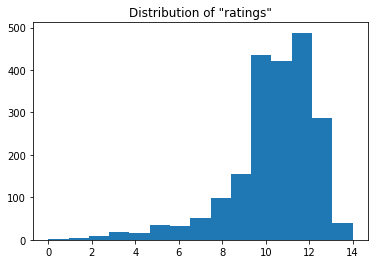

In [4]:
# ratings distribution on master dataframe
plt.hist(df_master.rating, bins = 15)
plt.title('Distribution of "ratings"');

In [5]:
df_master.rating.value_counts()

12    488
10    435
11    421
13    287
9     154
8      98
7      51
14     39
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating, dtype: int64

* largest number of ratings are 12/10

In [80]:
# dog stage influence on quality
df_master.groupby(['dog_stage'], as_index = False)['rating'].mean()

,dog_stage,rating
0,None,10.508445
1,doggo,11.772152
2,floofer,11.800000
3,pupper,10.701195
4,puppo,12.166667


In [7]:
# Create a subset of the rating data for ratings greater and equal to 10
df_subset = df_master[df_master.rating >= 10]
df_subset.groupby(['dog_stage'], as_index = False)['rating'].mean()

,dog_stage,rating
0,None,11.407846
1,doggo,12.013514
2,floofer,11.800000
3,pupper,11.354369
4,puppo,12.275862


In [8]:
# Proportion of 10+ ratings for the different dog stages
df_subset.dog_stage.value_counts()/df_master.dog_stage.value_counts()

None       0.786838
pupper     0.820717
doggo      0.936709
puppo      0.966667
floofer    1.000000
Name: dog_stage, dtype: float64

* Twitter postings that mention dog_stages are most often ranked 10 or greater. 'Floofer' is always ranked 10 or higher, while  'pupper' consists of a few ratings below 10

In [95]:
# Average ratings for Twitter postings vs Vine postings
df_master.groupby(['source'], as_index = False)['rating'].mean()

,source,rating
0,twitter,10.573647
1,vine,11.395604


* vines rated higher than a twitter post

In [9]:
# observe distrubution for expanded_urls
df_master.expanded_urls.value_counts()

rateDogs photo           1895
rateDogs vine              91
rateDogs video             72
external twitter post      29
Name: expanded_urls, dtype: int64

In [10]:
# Average ratings 
df_master.groupby(['expanded_urls'], as_index = False)['rating'].mean()

,expanded_urls,rating
0,external twitter post,12.655172
1,rateDogs photo,10.490765
2,rateDogs video,11.916667
3,rateDogs vine,11.395604


* External twitter posts and Videos generally rated higher. It is worth noting though that the number of video and external posts is also significantly lower

In [105]:
df_subset.groupby(['rating'], as_index = False)['favorite_count'].mean()

,rating,favorite_count
0,10,4168.947126
1,11,6729.178147
2,12,10828.920082
3,13,22310.397213
4,14,29032.871795


* Higher the rating, higher the favorite count

In [80]:
df_subset.groupby(['rating'], as_index = False)['retweet_count'].mean()

,rating,retweet_count
0,10,1519.777011
1,11,2174.339667
2,12,3050.352459
3,13,6822.013937
4,14,9430.384615


* retweets are also proportional to rating

In [75]:
# group list of retweet counts by rating and plot it
retweet_rating_list = df_master.groupby('rating')['retweet_count'].apply(list)

In [76]:
retweet_rating_list

rating
0                                                [3309]
1                               [6576, 2366, 414, 2778]
2      [846, 325, 490, 121, 297, 4264, 893, 2760, 1609]
3     [354, 563, 822, 554, 342, 344, 600, 1717, 675,...
4     [587, 472, 538, 320, 729, 2647, 2208, 1149, 13...
5     [40, 175, 315, 331, 244, 460, 292, 255, 701, 8...
6     [141, 44, 568, 198, 597, 252, 761, 973, 337, 3...
7     [47, 40, 83, 48, 129, 223, 61, 233, 328, 202, ...
8     [513, 57, 67, 72, 47, 222, 94, 48, 56, 58, 198...
9     [44, 141, 60, 73, 64, 91, 84, 20, 83, 258, 227...
10    [58, 249, 217, 163, 35, 135, 46, 53, 209, 66, ...
11    [12, 76, 93, 1003, 63, 268, 92, 100, 224, 153,...
12    [111, 98, 51, 17597, 109, 85, 2200, 1151, 97, ...
13    [646, 1134, 120, 7588, 3650, 492, 2186, 270, 1...
14    [17073, 14485, 4221, 5912, 17209, 6196, 4840, ...
Name: retweet_count, dtype: object

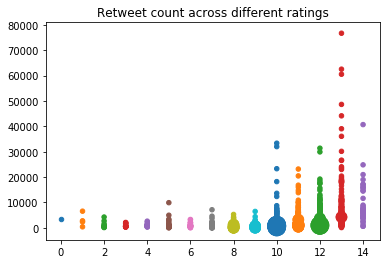

In [86]:
#REF: https://stackoverflow.com/questions/37759475/scatter-plot-same-point-repeated-several-times-python
size_constant = 20
for xe, ye in retweet_rating_list.items():
    xAxis = [xe] * len(ye)
    #square it to amplify the effect, if you do ye.count(num)*size_constant the effect is barely noticeable
    sizes = [ye.count(num)**2.5 * size_constant for num in ye]
    plt.scatter(xAxis, ye, s=sizes)

plt.title('Retweet count across different ratings');

* Note for the rating 8,10,11,12 there is high frequency of retweets under 10000. Rating 13 has the highest range, and the maximum is close to 80000!The variation fo different retweet counts also jumps after 10

In [87]:
# Doing the same process for Favorite counts
# group list of favorite counts by rating and plot it
favorite_rating_list = df_master.groupby('rating')['favorite_count'].apply(list)
favorite_rating_list

rating
0                                               [23896]
1                              [14293, 5922, 842, 6566]
2     [1210, 445, 771, 402, 577, 5740, 1700, 5733, 3...
3     [500, 828, 1307, 910, 701, 690, 1484, 3304, 14...
4     [890, 620, 909, 556, 1150, 3606, 3675, 3432, 3...
5     [109, 354, 505, 740, 454, 830, 603, 651, 1226,...
6     [298, 118, 778, 319, 801, 683, 1374, 1531, 585...
7     [130, 109, 165, 125, 339, 474, 193, 545, 498, ...
8     [2560, 111, 154, 220, 187, 435, 242, 168, 192,...
9     [125, 297, 147, 164, 149, 198, 168, 104, 233, ...
10    [133, 433, 476, 321, 102, 296, 125, 165, 523, ...
11    [80, 174, 188, 2587, 261, 623, 320, 264, 541, ...
12    [316, 255, 187, 48639, 393, 309, 6933, 1734, 3...
13    [1339, 1707, 589, 13233, 7285, 1418, 6456, 114...
14    [35065, 36908, 7707, 17657, 34383, 23478, 1474...
Name: favorite_count, dtype: object

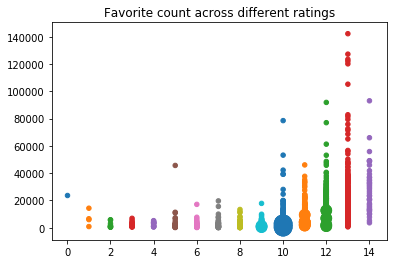

In [88]:
# plot favorite distribution the same way as done for retweet count
size_constant = 20
for xe, ye in favorite_rating_list.items():
    xAxis = [xe] * len(ye)
    #square it to amplify the effect, if you do ye.count(num)*size_constant the effect is barely noticeable
    sizes = [ye.count(num)**2.5 * size_constant for num in ye]
    plt.scatter(xAxis, ye, s=sizes)

plt.title('Favorite count across different ratings');

* Similar behavior for 'favorite count' as it was for 'retweet count': The largest variations occur for rating 13. 

In [151]:
# Now we will look at the variation for ratings across the top dog breeds
## Start by looking at the top dog breeds
df_master.dog_prediction.value_counts().head()

golden_retriever      155
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
Name: dog_prediction, dtype: int64

* Top 4 dog with high enough counts to warrant further analysis across different ratings

In [153]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'expanded_urls', 'rating',
       'dog_stage', 'favorite_count', 'retweet_count', 'dog_prediction',
       'prediction_confidence'],
      dtype='object')

In [12]:
#group count per breed for specific dogs
golden_list = df_master.query('dog_prediction == "golden_retriever" & rating >= 10')['rating'].value_counts().sort_index().values.tolist()
labrador_list = df_master.query('dog_prediction == "Labrador_retriever" & rating >= 10')['rating'].value_counts().sort_index().values.tolist()
pembroke_list = df_master.query('dog_prediction == "Pembroke" & rating >= 10')['rating'].value_counts().sort_index().values.tolist()
chihuahua_list = df_master.query('dog_prediction == "Chihuahua" & rating >= 10')['rating'].value_counts().sort_index().values.tolist()


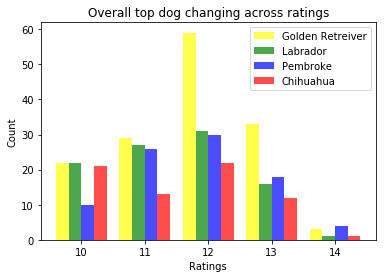

In [13]:
ind = np.arange(len(golden_list))
width = 0.2
golden_bars = plt.bar(ind, golden_list, width, color = 'yellow', alpha=0.7, label = 'Golden Retreiver')
labrador_bars = plt.bar(ind+width, labrador_list, width, color = 'green', alpha=0.7, label = 'Labrador')
pembroke_bars = plt.bar(ind+width+width, pembroke_list, width, color = 'blue', alpha=0.7, label = 'Pembroke')
chihuahua_bars = plt.bar(ind+width+width+width, chihuahua_list, width, color = 'red', alpha=0.7, label = 'Chihuahua')
plt.ylabel('Count')
plt.xlabel('Ratings')
plt.title('Overall top dog changing across ratings')
locations = ind + 1.5*width # xtick locations
labels = ['10', '11', '12', '13', '14']  # xtick labels
# specify x coordinates of tick labels and their labels
plt.xticks(locations, labels)
plt.legend();

* More or less a 'bell shaped' distribution around the rating range of 10 to 14. however 'Chihuahua' see a dip at the 11 rating, while a huge jump for 'golden retrievers' at ratings 12 and 13